In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 0.60106221, -2.74553237],
       [-4.96540645,  4.32119643],
       [ 4.79259733, -8.0953302 ],
       ...,
       [-6.34188715,  4.33832932],
       [ 0.639671  , -1.11518257],
       [ 0.08699116, -1.36699528]], shape=(1000, 2))

In [4]:
y

array([1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2,
       1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1,
       1, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0,
       1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2,
       1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 0, 0, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2,
       0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2,

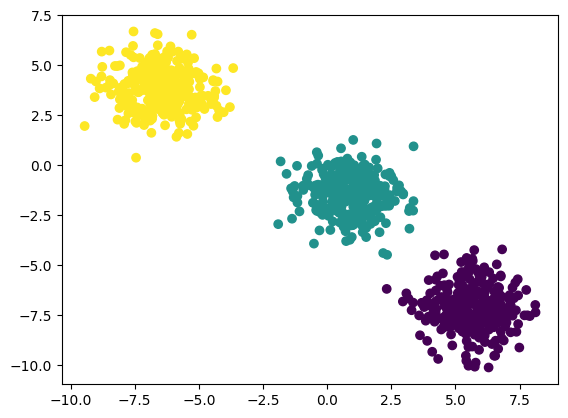

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[1339.9999999999995,
 329.65594815728866,
 59.149713859255925,
 51.588310998997166,
 44.34276083529502,
 37.2800243432422,
 33.66970739926373,
 33.06645572392151,
 25.70030022141401,
 23.90487925937634]

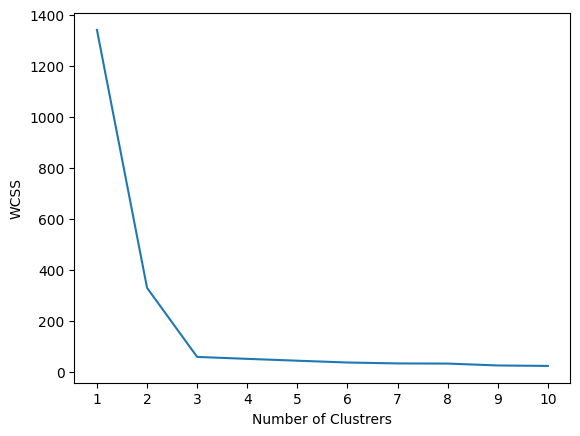

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [15]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1,
       1, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 1, 0, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0,
       0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1,
       0, 1, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2,
       0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2,
       2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2,

In [16]:
y_pred=kmeans.predict(X_test_scaled)

In [17]:
y_pred

array([0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2,
       2, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1,
       2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1,
       1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1,
       2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1,
       1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2,

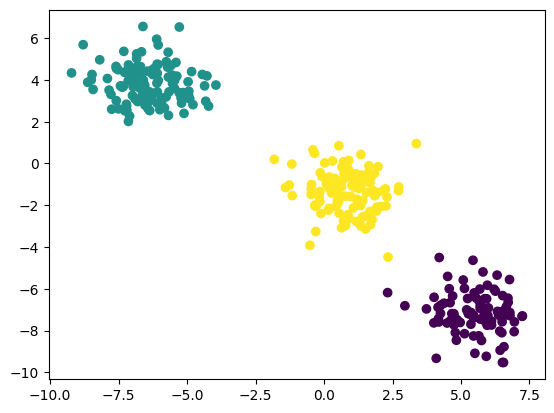

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [19]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [20]:
## kneelocator
!pip install kneed


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [23]:
kl.elbow

np.int64(3)

In [24]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [26]:
silhouette_coefficients

[0.6774267323251304,
 0.7664842041770907,
 0.6073910367868064,
 0.4518246715138497,
 0.4741541177965168,
 0.3513161290776694,
 0.3360326954297428,
 0.32963107879595427,
 0.35258322371683304]

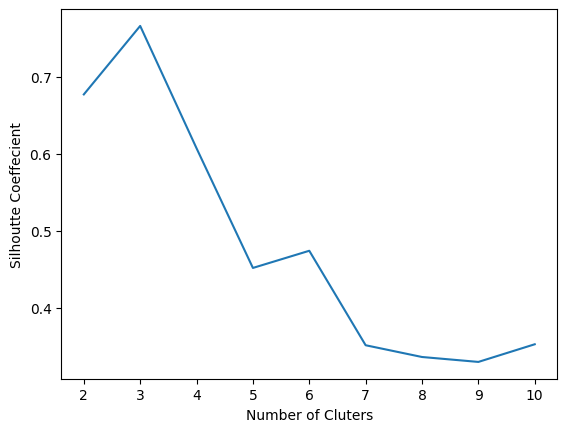

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()